# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# Exploratory Data Analysis

In [2]:
data_path = 'data/diamonds.csv'

with open(data_path,'r') as csvfile:
    data = pd.read_csv(csvfile)

print(data) #see sample data
data.info() #checking info
data.describe() #statistic description

       carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## Column Description

|Column|Description                                                      |
|:-----|:---------------------------------------------------------------|
|carat |weight of the diamond (0.2--5.01)|
|cut |quality of the cut (Fair, Good, Very Good, Premium, Ideal)|
|color |diamond colour, from J (worst) to D (best)|
|clarity |a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))|
|depth |total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)|
|table |width of top of diamond relative to widest point (43--95)|
|price |price in US dollars (\$326--\$18,823)|
|x |length in mm (0--10.74)|
|y |width in mm (0--58.9)|
|y |depth in mm (0--31.8)|


It can be seen that the minimum value of the variables x, y, and z is 0. The variables x, y, and z show the dimensions so that it is suspected that there is a missing value in the variables x, y, and z. The following are the steps taken to handle missing values. First, check for missing values.

In [3]:
#check the number of missing value for each variable
x = (data.x == 0).sum()
y = (data.y == 0).sum()
z = (data.z == 0).sum()

print(f"In column x there are/is {x} missing value(s)")
print(f"In column y there are/is {y} missing value(s)")
print(f"In column z there are/is {z} missing value(s)")

In column x there are/is 8 missing value(s)
In column y there are/is 7 missing value(s)
In column z there are/is 20 missing value(s)


because the number of missing values tends to be small, it can be done deleting rows on rows that contain missing values. For this reason, a new variable is created that stores the data after it has been processed

In [4]:
#create new_data variable to store processed data
new_data = data.loc[(data[['x','y','z']]!=0).all(axis=1)]

#check data shape
new_data.shape

(53920, 10)

The next step is to check for outliers using a boxplot

<AxesSubplot:xlabel='carat'>

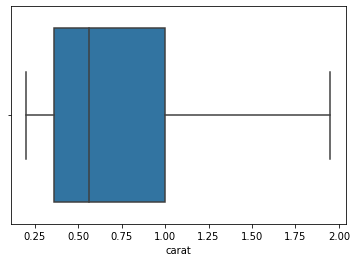

In [9]:
sns.boxplot(x=new_data['carat'])

In [ ]:
sns.boxplot(x=new_data['depth'])

In [ ]:
sns.boxplot(x=new_data['price'])

In [ ]:
sns.boxplot(x=new_data['table'])

In [ ]:
sns.boxplot(x=new_data['x'])

In [ ]:
sns.boxplot(x=new_data['y'])

In [ ]:
sns.boxplot(x=new_data['z'])

Remove outliers using IQR method

In [6]:
#Remove outliers until there is none

state = True

while state:
    #check initial row number
    init_row = new_data.shape[0]

    #doing IQR outliers removal
    Q1 = new_data.quantile(0.25)
    Q3 = new_data.quantile(0.75)
    IQR=Q3-Q1
    new_data=new_data[~((new_data<(Q1-1.5*IQR))|(new_data>(Q3+1.5*IQR))).any(axis=1)]

    #check final row number
    final_row = new_data.shape[0]

    #if there is no change in row number then stop
    if init_row == final_row:
        state = False

C:\Users\MSI-GAMMING\AppData\Local\Temp\ipykernel_19580\4193057550.py:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  new_data=new_data[~((new_data<(Q1-1.5*IQR))|(new_data>(Q3+1.5*IQR))).any(axis=1)]


In [10]:
# check dataset shape after outliers removal
new_data.shape

(43059, 10)

In [11]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

           sample number  percentage
Ideal              19415        45.1
Premium            10652        24.7
Very Good           9691        22.5
Good                3191         7.4
Fair                 110         0.3


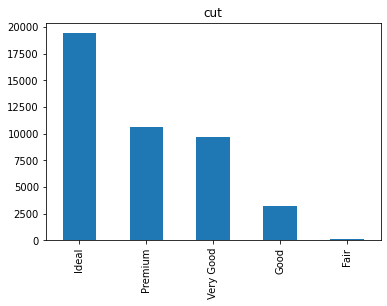

In [13]:
feature = categorical_features[0]
count = new_data[feature].value_counts()
percent = 100*new_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample number':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   sample number  percentage
G           9155        21.3
E           8157        18.9
F           7667        17.8
H           6426        14.9
D           5662        13.1
I           3960         9.2
J           2032         4.7


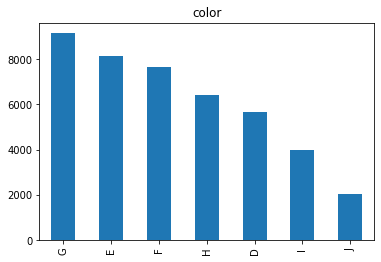

In [14]:
feature = categorical_features[1]
count = new_data[feature].value_counts()
percent = 100*new_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample number':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      sample number  percentage
SI1           10448        24.3
VS2           10022        23.3
VS1            6689        15.5
SI2            6576        15.3
VVS2           4192         9.7
VVS1           3198         7.4
IF             1532         3.6
I1              402         0.9


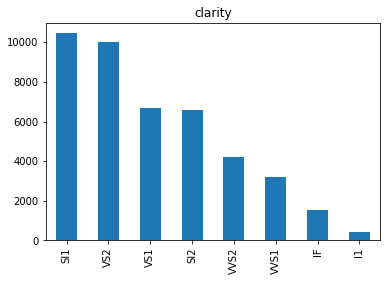

In [15]:
feature = categorical_features[2]
count = new_data[feature].value_counts()
percent = 100*new_data[feature].value_counts(normalize=True)
df = pd.DataFrame({'sample number':count, 'percentage':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

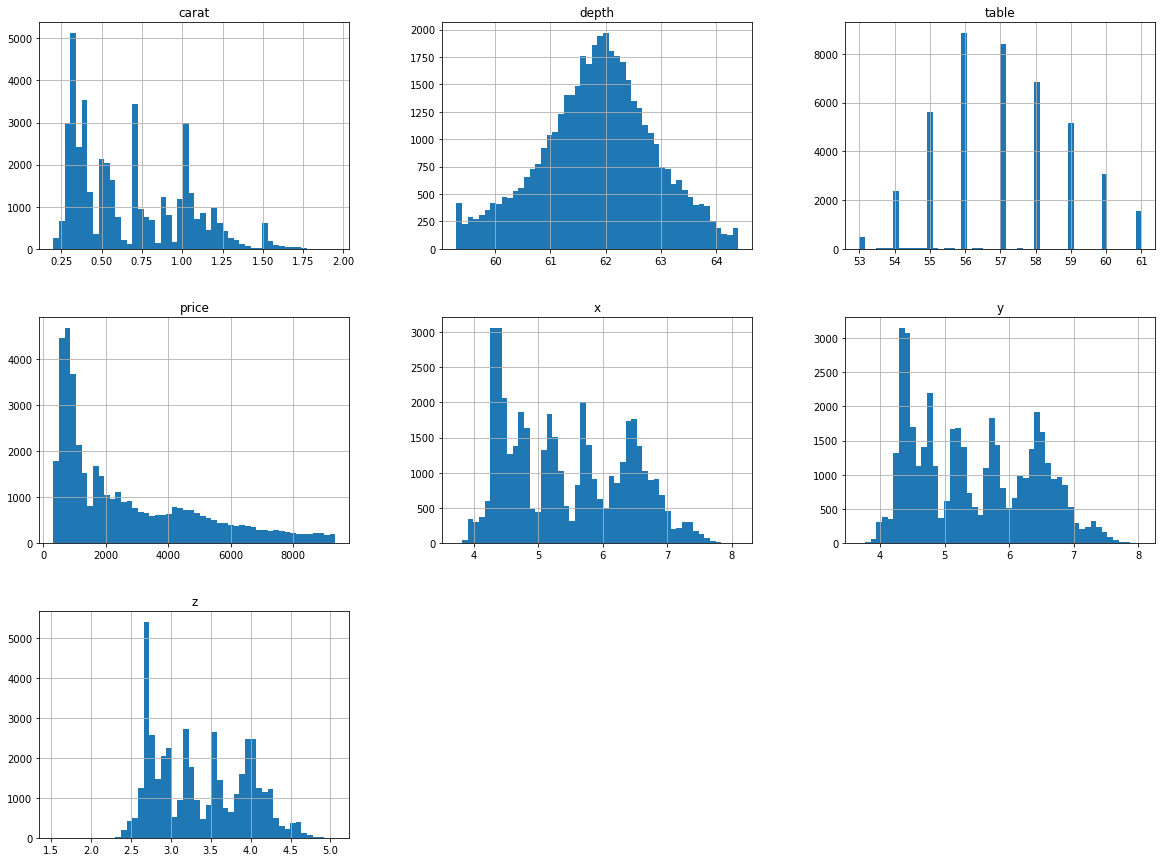

In [16]:
new_data.hist(bins=50, figsize=(20,15))
plt.show()

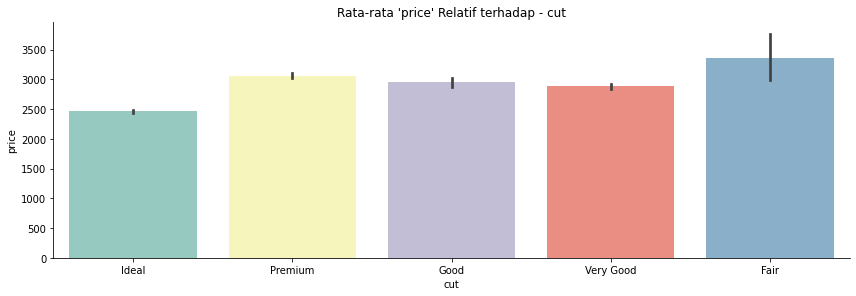

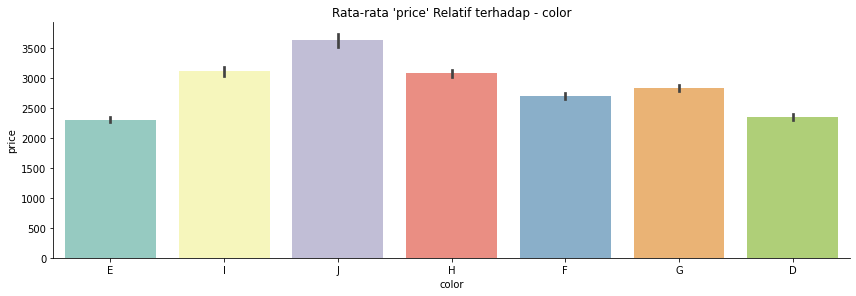

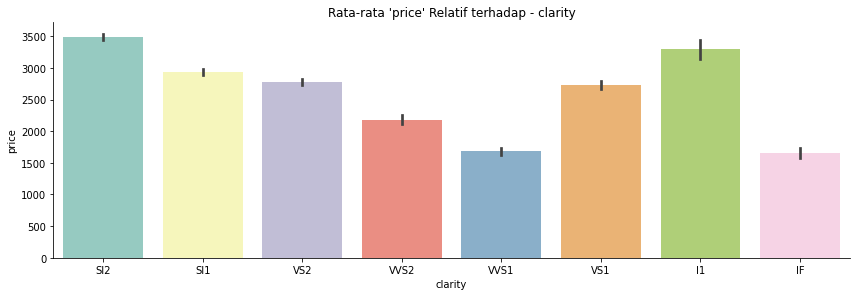

In [17]:
cat_features = new_data.select_dtypes(include='object').columns.to_list()
 
for col in cat_features:
  sns.catplot(x=col, y="price", kind="bar", dodge=False, height = 4, aspect = 3,  data=new_data, palette="Set3")
  plt.title("Rata-rata 'price' Relatif terhadap - {}".format(col))

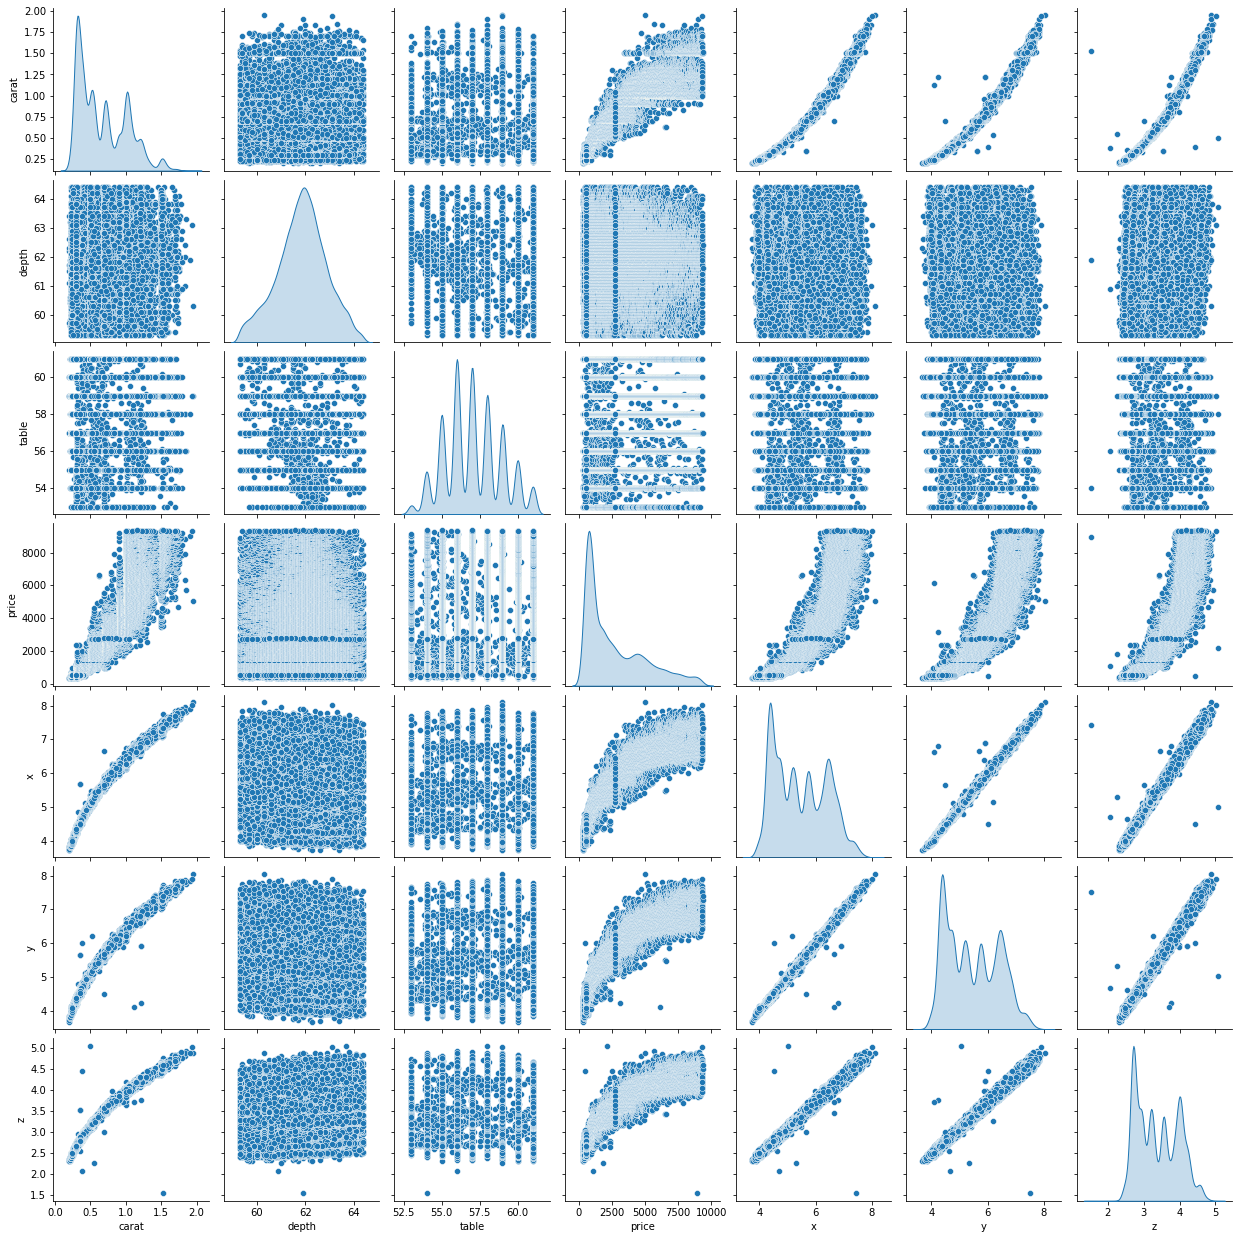

In [18]:
# Mengamati hubungan antar fitur numerik dengan fungsi pairplot()
sns.pairplot(new_data, diag_kind = 'kde')

Text(0.5, 1.0, 'Correlation Matrix untuk Fitur Numerik ')

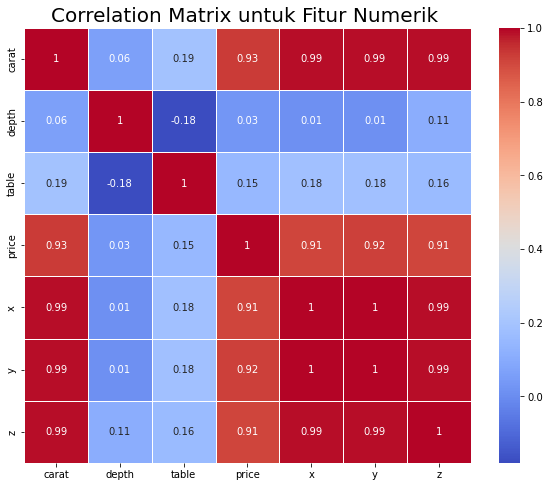

In [19]:
plt.figure(figsize=(10, 8))
correlation_matrix = new_data.corr().round(2)
 
# Untuk menge-print nilai di dalam kotak, gunakan parameter anot=True
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title("Correlation Matrix untuk Fitur Numerik ", size=20)

In [20]:
new_data.drop(['depth'], inplace=True, axis=1)
new_data.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,E,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,57.0,336,3.94,3.96,2.48


In [21]:
from sklearn.preprocessing import  OneHotEncoder
new_data = pd.concat([new_data, pd.get_dummies(new_data['cut'], prefix='cut')],axis=1)
new_data = pd.concat([new_data, pd.get_dummies(new_data['color'], prefix='color')],axis=1)
new_data = pd.concat([new_data, pd.get_dummies(new_data['clarity'], prefix='clarity')],axis=1)
new_data.drop(['cut','color','clarity'], axis=1, inplace=True)
new_data.head()

,carat,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,55.0,326,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,61.0,326,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.29,58.0,334,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0.31,58.0,335,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
5,0.24,57.0,336,3.94,3.96,2.48,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


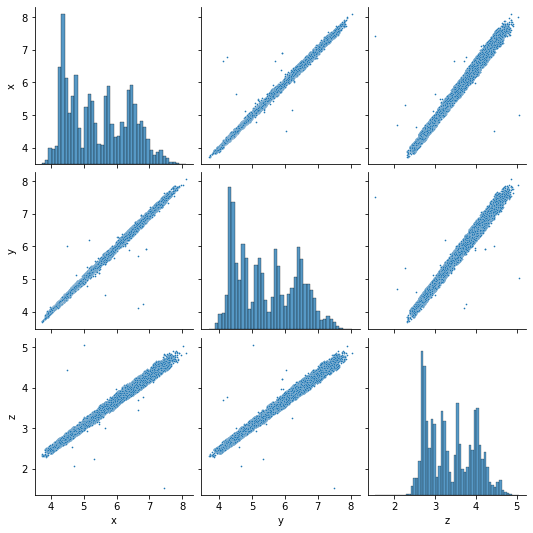

In [23]:
sns.pairplot(new_data[['x','y','z']], plot_kws={"s": 3})

In [24]:
from sklearn.decomposition import PCA
 
pca = PCA(n_components=3, random_state=123)
pca.fit(new_data[['x','y','z']])
princ_comp = pca.transform(new_data[['x','y','z']])

In [25]:
pca.explained_variance_ratio_.round(3)

array([0.998, 0.002, 0.001])

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1, random_state=123)
pca.fit(new_data[['x','y','z']])
new_data['dimension'] = pca.transform(new_data.loc[:, ('x','y','z')]).flatten()
new_data.drop(['x','y','z'], axis=1, inplace=True)

In [27]:
from sklearn.model_selection import train_test_split
 
X = new_data.drop(["price"],axis =1)
y = new_data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)

In [28]:
print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

Total # of sample in whole dataset: 43059
Total # of sample in train dataset: 38753
Total # of sample in test dataset: 4306


In [29]:
from sklearn.preprocessing import StandardScaler
 
numerical_features = ['carat', 'table', 'dimension']
scaler = StandardScaler()
scaler.fit(X_train[numerical_features])
X_train[numerical_features] = scaler.transform(X_train.loc[:, numerical_features])
X_train[numerical_features].head()

,carat,table,dimension
34854,-1.086176,1.059831,-1.250571
44741,-0.146805,-0.580416,0.041298
38476,-0.733912,-1.127165,-0.731243
695,0.352235,-0.033667,0.468409
30327,-0.910044,0.513082,-0.952968


In [30]:
# Siapkan dataframe untuk analisis model
models = pd.DataFrame(index=['train_mse', 'test_mse'], 
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
 
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
 
models.loc['train_mse','knn'] = mean_squared_error(y_pred = knn.predict(X_train), y_true=y_train)

In [32]:
# Impor library yang dibutuhkan
from sklearn.ensemble import RandomForestRegressor
 
# buat model prediksi
RF = RandomForestRegressor(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)
 
models.loc['train_mse','RandomForest'] = mean_squared_error(y_pred=RF.predict(X_train), y_true=y_train) 

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
 
boosting = AdaBoostRegressor(learning_rate=0.05, random_state=55)                             
boosting.fit(X_train, y_train)
models.loc['train_mse','Boosting'] = mean_squared_error(y_pred=boosting.predict(X_train), y_true=y_train)